### Warning! Old Code
This code uses old data that was calculated incorrectly with area_anom1.ipynb

In [20]:
import datetime as dt
import numpy as np
import matplotlib as mlp
matplotlib.use('Agg')
import matplotlib.pyplot as plt
import xarray as xr
import math
import netCDF4
import pandas as pd

%matplotlib inline

In [4]:
ECMWF_df = pd.read_csv('ECMWF_hits_feb9.csv',names=['Initialization', 'step', 'hits','s10', 's15', 's20', 's25', 's30', 's35'],
                 index_col=False, skiprows=1)
ECCC_df = pd.read_csv('ECCC_hits_feb9.csv',names=['Initialization', 'step', 'hits','s10', 's15', 's20', 's25', 's30', 's35'],
                 index_col=False, skiprows=1)
UKMO_df = pd.read_csv('UKMO_hits_feb9.csv',names=['Initialization', 'step', 'hits','s10', 's15', 's20', 's25', 's30', 's35'],
                 index_col=False, skiprows=1)
CMA_df = pd.read_csv('CMA_hits_feb9.csv',names=['Initialization', 'step', 'hits','s10', 's15', 's20', 's25', 's30', 's35'],
                 index_col=False, skiprows=1)
JMA_df = pd.read_csv('JMA_hits_feb9.csv',names=['Initialization', 'step', 'hits','s10', 's15', 's20', 's25', 's30', 's35'],
                 index_col=False, skiprows=1)
CNR_df = pd.read_csv('CNR_hits_feb9.csv',names=['Initialization', 'step', 'hits','s10', 's15', 's20', 's25', 's30', 's35'],
                 index_col=False, skiprows=1)
per_df = pd.read_csv('per_hits_feb9_b1.csv',names=['Initialization', 'ECMWF', 'ECCC', 'UKMO', 'CMA', 'JMA', 'CNR'],
                 index_col=False, skiprows=1)
avg_per_df = pd.read_csv('avg_per_hits_feb9_b1.csv',names=['Models','ECMWF', 'ECCC', 'UKMO', 'CMA', 'JMA', 'CNR', 'High-top', 'Low-top'],
                 index_col=False, skiprows=1, nrows=1)

In [5]:
#Creating Slices in order to select dates that are in between these 5day ranges
s10 = slice("2021-01-27T00:00:00.000000000", "2021-01-31T00:00:00.000000000") #<-- 10-14 days in advance
s15 = slice("2021-01-22T00:00:00.000000000", "2021-01-26T00:00:00.000000000") #<-- 15-19 days in advance
s20 = slice("2021-01-17T00:00:00.000000000", "2021-01-21T00:00:00.000000000") #<-- 20-24 day 
s25 = slice("2021-01-12T00:00:00.000000000", "2021-01-16T00:00:00.000000000") #<-- 25-29 days
s30 = slice("2021-01-07T00:00:00.000000000", "2021-01-11T00:00:00.000000000") #<-- 30-34 days 
s35 = slice("2021-01-02T00:00:00.000000000", "2021-01-06T00:00:00.000000000") #<-- 35-39 days

In [6]:
per_df

,Initialization,ECMWF,ECCC,UKMO,CMA,JMA,CNR
0,10-14,20,40.0,60.00,0.00,6.12,0.0
1,15-19,20,NaN,6.67,33.33,NaN,NaN
2,20-24,21,25.0,6.67,16.67,12.24,17.5
3,25-29,20,30.0,33.33,0.00,10.20,12.5
4,30-34,19,NaN,13.33,0.00,NaN,NaN
5,35-39,14,NaN,13.33,0.00,NaN,NaN


In [7]:
avg_per_df

,Models,ECMWF,ECCC,UKMO,CMA,JMA,CNR,High-top,Low-top
0,Models,19.25,31.67,20.43,8.33,9.52,10,16.4,16.67


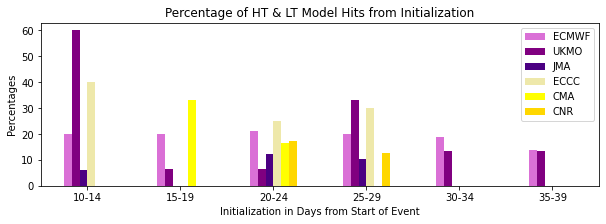

In [23]:
ax = per_df.plot.bar(x='Initialization', y=['ECMWF','UKMO','JMA', 'ECCC','CMA', 'CNR'], rot=0,
                title='Percentage of HT & LT Model Hits from Initialization', color=['orchid','purple','indigo','palegoldenrod','yellow', 'gold']) 
plt.xlabel('Initialization in Days from Start of Event') 
plt.ylabel('Percentages')
fig = mlp.pyplot.gcf()
fig.set_size_inches(10, 3)

In [9]:
ECMWF_mn = per_df['ECMWF'].mean()
ECCC_mn = per_df['ECCC'].mean()
UKMO_mn = per_df['UKMO'].mean()
CMA_mn = per_df['CMA'].mean()
JMA_mn = per_df['JMA'].mean()
CNR_mn = per_df['CNR'].mean()
ht_mn = (ECMWF_mn + UKMO_mn + JMA_mn)/3
lt_mn = (ECCC_mn + CMA_mn + CNR_mn)/3

In [10]:
print(f'ECMWF:{ECMWF_mn}')
print(f'ECCC:{ECCC_mn}')
print(f'UKMO:{UKMO_mn}')
print(f'CMA:{CMA_mn}')
print(f'CMA:{JMA_mn}')
print(f'CMA:{CNR_mn}')
print(f'HT:{ht_mn}')
print(f'LT:{lt_mn}')

ECMWF:19.0
ECCC:31.666666666666668
UKMO:22.221666666666668
CMA:8.333333333333334
CMA:9.52
CMA:10.0
HT:16.913888888888888
LT:16.666666666666668


Text(0, 0.5, 'Percentages')

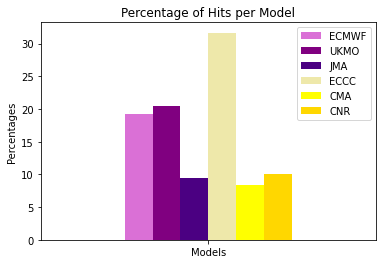

In [11]:
ax = avg_per_df.plot.bar(x='Models', y=['ECMWF','UKMO', 'JMA', 'ECCC','CMA', 'CNR'], rot=0,
                title='Percentage of Hits per Model', color=['orchid','purple','indigo','palegoldenrod','yellow', 'gold'])
plt.xlabel('') 
plt.ylabel('Percentages')

Text(0, 0.5, 'Percentages')

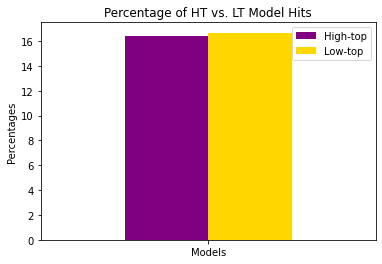

In [14]:
ax = avg_per_df.plot.bar(x='Models', y=['High-top', 'Low-top'], rot=0, title='Percentage of HT vs. LT Model Hits', 
                  color=['purple','gold']) 
plt.xlabel('') 
plt.ylabel('Percentages')